# Sinh viên 1: Nguyễn Mậu Trọng Hiếu - 20120081 (siu vjp pro)

# ...

# Lớp 20TN


In [2]:
# import libraries
import os
import shutil
import random
import time
import math
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
from test_primarily import *
from Lucas import Baillie_PSW_Test

True


In [4]:
# generated test will be stored in this folder
route_test = "generated_test"

try:
    shutil.rmtree(route_test)
except:
    pass

try:
    os.mkdir(route_test)
except:
    pass

SEED = 42
random.seed(SEED)

In [5]:
# trick to count number of comparisons
def inc(x):
    x[0] = x[0] + 1
    return True


def measure_time(func, *args):
    start = time.time()
    results = func(*args)
    end = time.time()
    return end - start, results


def plot_run_times(run_times, steps):
    x = steps
    for algorithm, run_time in run_times.items():
        plt.plot(x, run_time, label=algorithm)
    plt.xlabel('Input Size (Number of Digits)')
    plt.ylabel('Run Time (Seconds)')
    plt.legend()
    plt.show()


def plot_comparisons(comparisons, steps):
    x = steps
    for algorithm, comparison in comparisons.items():
        plt.plot(x, comparison, label=algorithm)
    plt.xlabel('Input Size (Number of Digits)')
    plt.ylabel('Number of Comparisons')
    plt.legend()
    plt.show()

In [6]:
from sympy import randprime
from sympy.ntheory import isprime
from random import randint
from Crypto.Random.random import randint
from Crypto.Util.number import getPrime
from math import log2

def generate_random_number(n_digits):
    lower = 10 ** (n_digits - 1)
    upper = (10 ** n_digits) - 1
    return randint(lower, upper + 1)


# generate a random prime number that has n_digits
def generate_random_large_prime(n_digit):
    lower = 10 ** (n_digit - 1)
    upper = (10 ** n_digit) - 1
    number = getPrime(int(log2(upper)))
    while number < lower:
        number = getPrime(int(log2(upper)))
        
    # number = randprime(lower, upper)
    return number

# generate a list of n_p primes that have p_digit each
def generate_random_large_nonprime(n_digit):
    a = generate_random_large_prime(n_digit)
    b = generate_random_large_prime(n_digit//2)
    return abs(a - b)

## Phần kiểm tra về tốc độ chạy giữa các thuật toán


{'fermat_little': 0, 'miller_rabin': 0, 'Baillie_PSW_Test': 0}


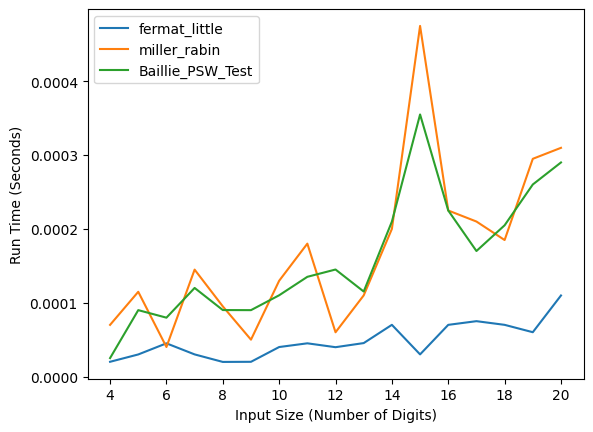

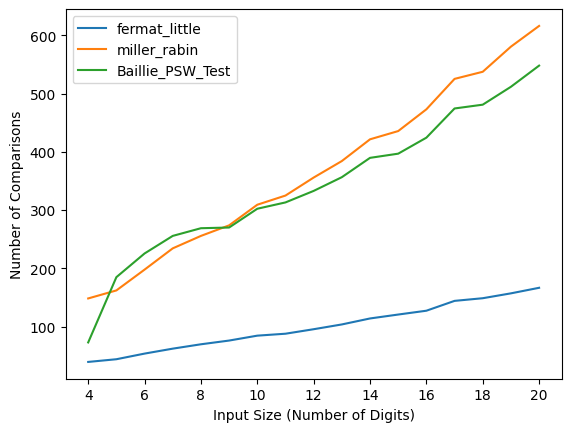

In [7]:
list_of_algo = [fermat_little, miller_rabin, Baillie_PSW_Test]
run_times = {}
comparisons_count = {}
wrong_freqency = {}
# init dictionary
for func in list_of_algo:
    run_times[func.__name__] = {}
    comparisons_count[func.__name__] = {}

n_digts = range(4, 21, 1)
n_repeat = 200
for n_digt in n_digts:
    save_path = os.path.join(route_test, f'test_case_{n_digt}_digit.txt')
    # open the file and close it, similar to touch command
    open(save_path, 'a').close()
    for repeat in range(n_repeat):
        with open(save_path, 'a') as f:
            number = generate_random_number(n_digt) if not randint(0, 5) else generate_random_large_prime(n_digt)
            
            # number = generate_random_number(n_digt)
            f.write('Input: ' + str(number) + '\n')
            check_ans = []
            for func in list_of_algo:
                run_time, results = measure_time(func, number)
                results, comparisons = results
                func_name = func.__name__
                try:
                    run_times[func_name][repeat].append(run_time)
                    comparisons_count[func_name][repeat].append(
                        comparisons)
                except:
                    run_times[func_name][repeat] = [run_time]
                    comparisons_count[func_name][repeat] = [comparisons]
                    
                verdict = 1 if results != isprime(number) else 0

                try:
                    wrong_freqency[func_name] += verdict 
                except:
                    wrong_freqency[func_name] = verdict
                    

avg_run_times = {}
avg_comparisons_count = {}
print(wrong_freqency)

for func in list_of_algo:
    calculate_run_time = []
    calculate_comparisons_count = []
    for repeat in range(n_repeat):
        calculate_run_time.append(run_times[func.__name__][repeat])
        calculate_comparisons_count.append(
            comparisons_count[func.__name__][repeat])
    avg_run_times[func.__name__] = np.mean(calculate_run_time, axis=0)
    avg_comparisons_count[func.__name__] = np.mean(
        calculate_comparisons_count, axis=0)

plot_run_times(avg_run_times, n_digts)
plot_comparisons(avg_comparisons_count, n_digts)

## Phần kiểm tra tốc độ chạy của thuật toán Miller Rabin với tham số đầu vào khác nhau


{'fermat_little_None': 0, 'miller_rabin_1': 0, 'miller_rabin_2': 0, 'miller_rabin_5': 0, 'miller_rabin_10': 0, 'miller_rabin_20': 0}


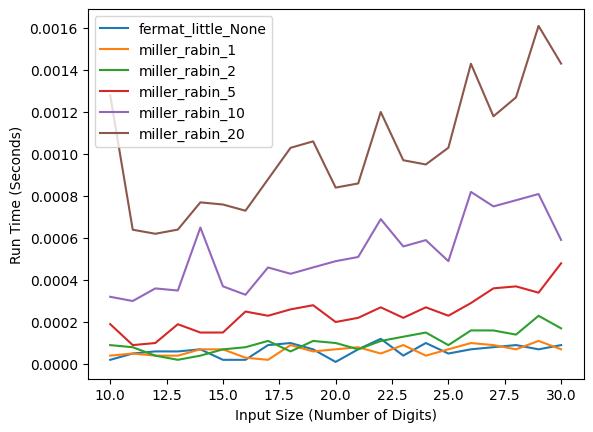

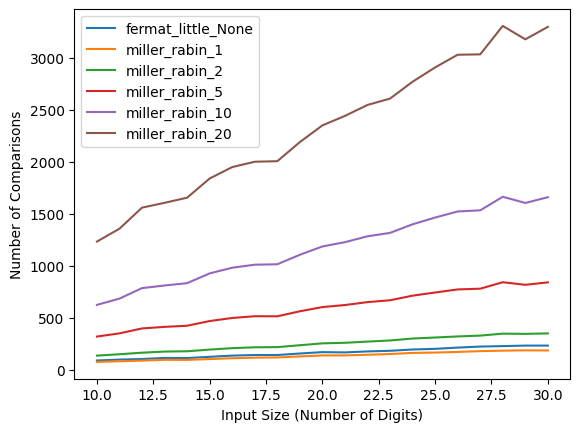

In [8]:
list_of_algo = [fermat_little, miller_rabin, miller_rabin, miller_rabin, miller_rabin, miller_rabin]
k_list       = [None, 1, 2, 5, 10, 20]
run_times = {}
comparisons_count = {}

wrong_freqency = {}
# init dictionary
for func, k_number in zip(list_of_algo, k_list):
    func_name = func.__name__ + '_' + str(k_number)

    run_times[func_name] = {}
    comparisons_count[func_name] = {}

n_digts = range(10, 31, 1) 
n_repeat = 100
for n_digt in n_digts:
    save_path = os.path.join(route_test, f'test_case_{n_digt}_digit_Miller_Rabin.txt')
    open(save_path, 'a').close()
    for repeat in range(n_repeat):
        with open(save_path, 'a') as f:
            number = generate_random_number(n_digt) if not randint(0, 5) else generate_random_large_prime(n_digt)
            # number = generate_random_number(n_digt)
            f.write('Input: ' + str(number) + '\n')
            check_ans = []
            for func, k_number in zip(list_of_algo, k_list):
                if func.__name__ == 'miller_rabin':
                    run_time, results = measure_time(func, number, k_number)
                else:
                    run_time, results = measure_time(func, number)
                    
                # print(results)
                results, comparisons = results
                func_name = func.__name__ + '_' + str(k_number)
                try:
                    run_times[func_name][repeat].append(run_time)
                    comparisons_count[func_name][repeat].append(comparisons)
                except:
                    run_times[func_name][repeat] = [run_time]
                    comparisons_count[func_name][repeat] = [comparisons]
                
                verdict = 1 if results != isprime(number) else 0

                try:
                    wrong_freqency[func_name] += verdict 
                except:
                    wrong_freqency[func_name] = verdict
                    
            
            # Kiểm tra đáp án của các thuật toán có giống nhau không
            # assert check_ans.count(check_ans[0]) == len(check_ans), 'Các thuật toán không trả về đáp án giống nhau'            

avg_run_times = {}
avg_comparisons_count = {}

print(wrong_freqency)
for func, k_number in zip(list_of_algo, k_list):
    func_name = func.__name__+ '_' + str(k_number)
    calculate_run_time = []
    calculate_comparisons_count = []
    for repeat in range(n_repeat):
        calculate_run_time.append(run_times[func_name][repeat])
        calculate_comparisons_count.append(comparisons_count[func_name][repeat])
    avg_run_times[func_name] = np.mean(calculate_run_time, axis=0)
    avg_comparisons_count[func_name] = np.mean(calculate_comparisons_count, axis=0)

plot_run_times(avg_run_times, n_digts)
plot_comparisons(avg_comparisons_count, n_digts)


## Phần kiểm tra về xác suất đúng của các thuật toán Monte Carlo
- Trong 2 code block dưới đây chỉ quan trọng về tính đúng của những thuật toán, nên là sẽ không còn chạy đếm số so sánh và đo thời gian chạy nữa.
- Chỉ đếm mỗi kết quả thì nó có ra đúng không
- Để kiểm tra việc đúng đó thì chúng em dùng hàm `isprime` có sẵn trong sympy. Hàm đó chính là sử dụng kiểm tra Baillie-PSW được chắc chắn chính xác với các số $\le 10^{17}$

In [9]:
list_of_algo = [fermat_little, miller_rabin,  miller_rabin,  miller_rabin,  miller_rabin, Baillie_PSW_Test]
k_list =        [None, 1, 2, 5, 10, None]
wrong_freqency = {}

from tqdm import tqdm

for number in tqdm(range(1, 10**6 + 1)):
    for func, k_number in zip(list_of_algo, k_list):
        if k_number:
            run_time, results = measure_time(func, number, k_number)
        else:
            run_time, results = measure_time(func, number)
            
        results, comparisons = results
        
        func_name = func.__name__ + '_' + str(k_number)
        
        if results != isprime(number):
            try:
                wrong_freqency[func_name].append(number)
            except:
                wrong_freqency[func_name] = [number]

100%|██████████| 1000000/1000000 [01:19<00:00, 12588.91it/s]


fermat_little_None [9, 25, 65, 105, 135] 436
miller_rabin_1 [25, 91, 469, 703, 949] 80
miller_rabin_2 [7471, 12403, 13747, 256961, 282133] 6
miller_rabin_5 [] 0
miller_rabin_10 [] 0
Baillie_PSW_Test_None [] 0


[]

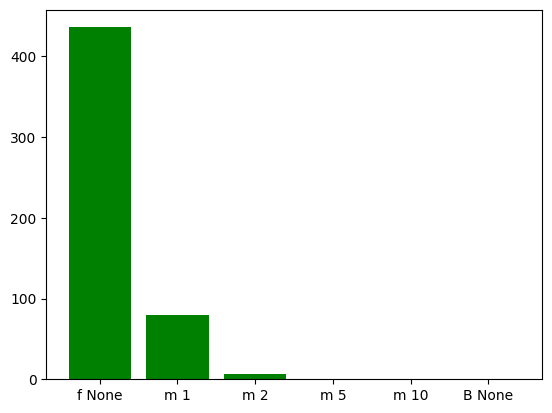

In [10]:
drawing = {}
# Cho ra những số mà thuật toán chạy sai
# Nếu có quá nhiều thì chỉ in ra 5 số đầu tiên, kế tiếp chính là số lượng số bị sai

for func, k_number in zip(list_of_algo, k_list):
    func_name = func.__name__ + '_' + str(k_number)
    ans = wrong_freqency.get(func_name, [])
    print(func_name, ans[:5], len(ans))
    drawing[func.__name__[0] + ' ' + str(k_number)] = len(ans)

# plot ra cái histogram 
plt.bar(list(drawing.keys()), drawing.values(), color ='g')
plt.plot()

# Nhận xét:
